# Classification Methods, SVMs, Tuning and CV


Like R, Python uses packages in data mining/machine learning. The 3 mose common ones are Pandas (manipulation), Scikit Learn (machine learning) and Matplotlit (graphics).

In [1]:
#Add packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
import time
from operator import itemgetter
import os
os.getcwd()

'/Users/mpgartland/Documents/Courses/Predictive Models/PM/Week 4-5'

In [2]:
cd '/Users/mpgartland/Documents/Courses/Predictive Models/PM/Week 4-5'

/Users/mpgartland/Documents/Courses/Predictive Models/PM/Week 4-5


# Read in Data
# Churn Calls Data
This is a Pandas operation.

In [3]:
#import data
df = pd.read_csv("Churn_Calls.csv", sep=',')
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no
5,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1,no
6,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1,no
7,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2,no
8,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,no
9,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2,no


In [4]:
# See each collum name
print df.columns

Index([u'state', u'account_length', u'area_code', u'international_plan',
       u'voice_mail_plan', u'number_vmail_messages', u'total_day_minutes',
       u'total_day_calls', u'total_day_charge', u'total_eve_minutes',
       u'total_eve_calls', u'total_eve_charge', u'total_night_minutes',
       u'total_night_calls', u'total_night_charge', u'total_intl_minutes',
       u'total_intl_calls', u'total_intl_charge',
       u'number_customer_service_calls', u'churn'],
      dtype='object')


In [5]:
df.shape

(5000, 20)

#Target
In this step I took the target variable and moved it to the first collum. I aslo made a reference to it called targetName. This just helps me with some below steps.

In [6]:
# designate target variable name
targetName = 'churn'
# move target variable into first column
targetSeries = df[targetName]
del df[targetName]
df.insert(0, targetName, targetSeries)
expected=targetName
df.head(10)

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0
5,no,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1
6,no,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1
7,no,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2
8,no,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2
9,no,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2


#EDA
Just a touch of EDA. This is the distribution of the target. As you can see, the datset is imbalanced and the target class of interest "yes" is in the minority (a common occurance in classification).

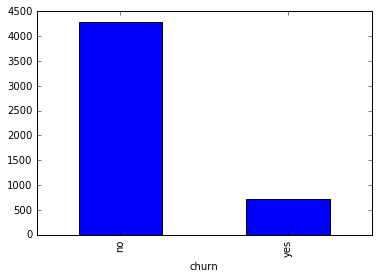

In [7]:
gb = df.groupby(targetName)
targetEDA=gb[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

#Preprocessing
The below two steps are for preprocessing. The first cell changes the yes/no of the target to numeric. I needed to do this as some models require the target to be numeric. The second cell takes all the category features and creates dummies with them. This is stock code I have used for long time (and I did not write it). It is nice because it will take any dataframe of any size and handle categorial features. I do not have to change a single line in it. It can be used generically on bascially any dataframe. Saves a lot of time of coding each feature.

In [8]:
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
df['churn'] = le_dep.fit_transform(df['churn'])

In [9]:
# perform data transformation
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

# Test/Train
I split the data into a 60/40 train test. The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test". I used a biggest test when I have an imbalanced set. 

In [10]:
# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(
    df.ix[:,1:].values, df.ix[:,0].values, test_size=0.40, random_state=0)

Just a view of the size of each test/train set.
Note there are now 73 features, and the test set is imbalanced (14.6%)

In [11]:
print features_test.shape
print features_train.shape
print target_test.shape
print target_train.shape
print "Percent of Target that is Yes", target_test.mean()
#data.groupby(['col1', 'col2'])

(2000, 73)
(3000, 73)
(2000,)
(3000,)
Percent of Target that is Yes 0.146


#Models
All the models are done in Sci-Kit Learn.

#Decision Tree
I created a decision tree from the data. The accurancy of the model was 921%, while the test data classified at 92%. However notice that the "yes" class (the class I am interested in) only properly classified at 74% (specificity) and .71 (recall). That is so-so. Again, not uncommon with imbalanced data. 

In [12]:
#Decision Tree train model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print "DT Accuracy Score", accuracy_score(target_test, target_predicted_dt)
# print classification report
target_names = ["Fail = no", "Fail = yes"]
print(classification_report(target_test, target_predicted_dt, target_names=target_names))

DT Accuracy Score 0.9225
             precision    recall  f1-score   support

  Fail = no       0.96      0.95      0.95      1708
 Fail = yes       0.73      0.74      0.74       292

avg / total       0.92      0.92      0.92      2000



#Cross Validation of Decision Tree
I cross validated with 10 repeats. You can see the OOB score for each repeat and the mean. The mean is .92, which is quite close to the orginal model. I am not going to worry about over fitting.

In [13]:
#verify DT with Cross Validation
scores = cross_val_score(clf, features_train, target_train, cv=10)
print "Cross Validation Score for each K",scores
scores.mean()                             

Cross Validation Score for each K [ 0.92358804  0.89700997  0.92358804  0.9269103   0.91694352  0.94314381
  0.909699    0.9264214   0.93311037  0.909699  ]


0.92101134457049516

#Visual of Confusion Matrix for Decision Tree

[[1628   80]
 [  75  217]]


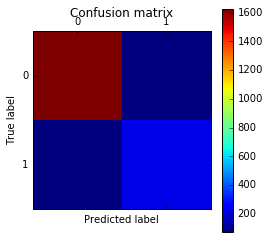

In [14]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_dt)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

#Random Forest
Using the same data, I built a random forest with 500 bootstrapped trees. Notice I parallelized this to 4 cores as big random forest can be computationally expensive. 

My overall results went up by 3% over the decision tree. Also, my minory target precision, but the recall decresed.  

In [15]:
# train random forest model
#paralleized to 4 cores 
rf = RandomForestClassifier(n_estimators= 500, n_jobs=-1,oob_score=True)
rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print accuracy_score(target_test, target_predicted_rf)
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print(confusion_matrix(target_test, target_predicted_rf))


0.9525
             precision    recall  f1-score   support

 Churn = no       0.95      1.00      0.97      1708
Churn = yes       0.97      0.70      0.81       292

avg / total       0.95      0.95      0.95      2000

[[1702    6]
 [  89  203]]


#Cross Validation of Random Forest
I cross validated with 10 repeats. You can see the OOB score for each repeat and the mean. The mean is .949, which is quite close to the orginal model. I am not going to worry about over fitting.

In [16]:
#verify RF with cross validation
scores_rf = cross_val_score(rf, features_train, target_train, cv=10, n_jobs=-1)
print "Cross Validation Score for each K",scores_rf
scores_rf.mean()

Cross Validation Score for each K [ 0.94684385  0.94019934  0.95348837  0.96345515  0.94019934  0.95317726
  0.95317726  0.94648829  0.94983278  0.95652174]


0.95033833709263449

#Visual of Confusion Matrix for Random Forest

[[1702    6]
 [  89  203]]


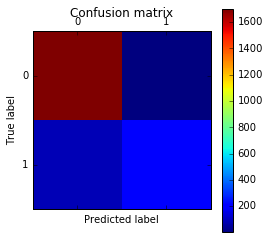

In [17]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_rf)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

#Model Tuning
You can tune any argument in these models. I did a grid search only on max_features (mtry in R). I parallelized the job to 4 cores for speed. You can see that max_features (mtry) of 5 had the best results. But frankly was very little difference from the other parameter results.

In [18]:
# use a full grid over all parameters
param_grid = {"max_features": [2, 3, 4, 5]}
start_time = time.clock()




# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid,n_jobs=-1)

grid_search.fit(features_train, target_train)

print time.clock() - start_time, "seconds"
print grid_search.grid_scores_


4.354098 seconds
[mean: 0.89100, std: 0.00703, params: {'max_features': 2}, mean: 0.90200, std: 0.00449, params: {'max_features': 3}, mean: 0.91467, std: 0.01059, params: {'max_features': 4}, mean: 0.92467, std: 0.00890, params: {'max_features': 5}]


#KNN
I performed KNN on K=3 and K=5. For both K's the accurancy was 85% and 87% respectively and I still have problems with the minority class. KNN and Decision Tree perform about the same. I find this to be true frequently, which is why I use them as my base comparative models. 

In [19]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(features_train, target_train)
# test KNN 3
target_predicted_knn3 = neigh3.predict(features_test)
print accuracy_score(target_test, target_predicted_knn3)
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted_knn3, target_names=target_names))

0.868
             precision    recall  f1-score   support

 Churn = no       0.89      0.96      0.93      1708
Churn = yes       0.59      0.31      0.41       292

avg / total       0.85      0.87      0.85      2000



In [20]:
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(features_train, target_train)
# test KNN 3
target_predicted_knn5 = neigh5.predict(features_test)
print accuracy_score(target_test, target_predicted_knn5)
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted_knn5, target_names=target_names))

0.882
             precision    recall  f1-score   support

 Churn = no       0.89      0.98      0.93      1708
Churn = yes       0.74      0.30      0.42       292

avg / total       0.87      0.88      0.86      2000



#More Details
Now that we know our random forest was the best model of the three I ran, I will gather some other information. Below is a non-ordered list of feature importance. I only showed 20 for purposes of space.

In [21]:
#Show importance of each feature in Random Forest
zip(df.columns[1:20], rf.feature_importances_)

[('account_length', 0.032506628021268483),
 ('number_vmail_messages', 0.016079749473477182),
 ('total_day_minutes', 0.12725737590033287),
 ('total_day_calls', 0.029697073839324982),
 ('total_day_charge', 0.12646065487498184),
 ('total_eve_minutes', 0.055534221890246684),
 ('total_eve_calls', 0.028477187735003764),
 ('total_eve_charge', 0.05478028405720365),
 ('total_night_minutes', 0.036853523182761784),
 ('total_night_calls', 0.028787265886193396),
 ('total_night_charge', 0.036470152704505841),
 ('total_intl_minutes', 0.041784768912667615),
 ('total_intl_calls', 0.046841756216550789),
 ('total_intl_charge', 0.040572686754162847),
 ('number_customer_service_calls', 0.10273572898086834),
 ('state_AK', 0.0007426579785588445),
 ('state_AL', 0.00069816949839634807),
 ('state_AR', 0.0018337591984110531),
 ('state_AZ', 0.0019249459800578161)]

#ROC curve for Random Forest
Finally a ROC curve that shows the lift I get from the Random Forest model. 

ROC AUC: 0.921


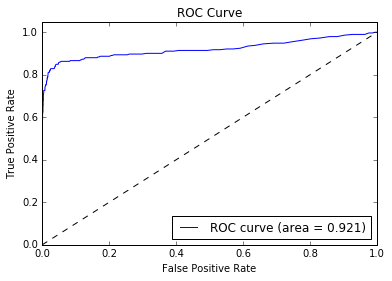

In [22]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(target_test, rf.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.3f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest does the best, but I still am not getting the accurancy on my target class of interest. I have a few tricks I can do to work on this, but that is for another day/class.

# SUPPORT VECTOR MACHINES

linear SVM with L2 penalty, Cost function of 1 and auto class weight. 

In [23]:
from sklearn.svm import LinearSVC
clf_linSVC=LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, class_weight='balanced')
clf_linSVC.fit(features_train, target_train)
predicted_SVC=clf_linSVC.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVC))
print accuracy_score(expected,predicted_SVC)

             precision    recall  f1-score   support

         No       0.86      1.00      0.92      1708
        Yes       0.83      0.02      0.03       292

avg / total       0.85      0.86      0.79      2000

[[1707    1]
 [ 287    5]]
0.856


# SVC kernel= linear
# Change Class_Weight

In [24]:
from sklearn.svm import SVC
#standard linear SVC
clf_lin = SVC(kernel='linear', C=1.0,class_weight=None,gamma=0.1)
clf_lin.fit(features_train, target_train)
predicted_SVM=clf_lin.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVM,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVM))
print accuracy_score(expected,predicted_SVM)

             precision    recall  f1-score   support

         No       0.86      1.00      0.92      1708
        Yes       1.00      0.01      0.02       292

avg / total       0.88      0.86      0.79      2000

[[1708    0]
 [ 289    3]]
0.8555


In [25]:
from sklearn.svm import SVC
#standard linear SVC
clf_lin = SVC(kernel='linear', C=1.0,class_weight='balanced',gamma='auto')
clf_lin.fit(features_train, target_train)
predicted_SVM=clf_lin.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVM,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVM))
print accuracy_score(expected,predicted_SVM)

             precision    recall  f1-score   support

         No       0.96      0.74      0.84      1708
        Yes       0.35      0.80      0.49       292

avg / total       0.87      0.75      0.79      2000

[[1271  437]
 [  57  235]]
0.753


In [26]:
from sklearn.svm import SVC
#standard linear SVC
clf_lin = SVC(kernel='linear', C=10.0,class_weight='balanced',gamma='auto')
clf_lin.fit(features_train, target_train)
predicted_SVM=clf_lin.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVM,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVM))
print accuracy_score(expected,predicted_SVM)

             precision    recall  f1-score   support

         No       0.95      0.71      0.82      1708
        Yes       0.32      0.79      0.46       292

avg / total       0.86      0.73      0.76      2000

[[1221  487]
 [  62  230]]
0.7255


# SVM using a RBF (non-linear) Kernel (High dimensional Space). Untuned.
Not shown

# SVM using Polynominal Kernel (2nd Degree), untuned.
Would not fit at 2nd and 3rd degree given 24 hours
NOT SHOWN

from sklearn.svm import SVC
#standard linear SVC
clf_poly = SVC(kernel='poly', degree=2, C=1.0,class_weight=None)
clf_poly.fit(features_train, target_train)
predicted_poly=clf_poly.predict(features_test)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_poly,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_poly))
print accuracy_score(expected,predicted_poly)

In [27]:
#Gradient Boost Classification
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
expected = target_test
print(classification_report(expected, predicted_GBC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_GBC))
print accuracy_score(expected,predicted_GBC)

             precision    recall  f1-score   support

         No       0.92      0.95      0.93      1708
        Yes       0.64      0.50      0.56       292

avg / total       0.88      0.89      0.88      2000

[[1624   84]
 [ 145  147]]
0.8855


In [28]:
#AdaBoost of a Decision Tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))
print accuracy_score(expected,predicted_bdt)

             precision    recall  f1-score   support

         No       0.96      0.98      0.97      1708
        Yes       0.88      0.74      0.80       292

avg / total       0.95      0.95      0.95      2000

[[1680   28]
 [  77  215]]
0.9475


In [29]:
#Extra Trees- Extremely Random Trees
from sklearn.ensemble import ExtraTreesClassifier
xtree = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
random_state=0)
xtree.fit(features_train, target_train)
predicted_xtree=xtree.predict(features_test)
scores_xtree=cross_val_score(xtree, features_train, target_train,n_jobs=-1)
print scores_xtree
print scores_xtree.mean() 
print(classification_report(expected, predicted_xtree,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_xtree))
print accuracy_score(expected,predicted_xtree)

[ 0.91608392  0.919       0.90690691]
0.913996940997
             precision    recall  f1-score   support

         No       0.95      0.96      0.96      1708
        Yes       0.74      0.73      0.74       292

avg / total       0.92      0.92      0.92      2000

[[1634   74]
 [  79  213]]
0.9235


In [30]:
#Standard Bagging Classifier
from sklearn.ensemble import BaggingClassifier 
#as with all models, there are lots of arguments to adjust
bag=BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, 
                      max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, 
                      warm_start=False, n_jobs=-1, random_state=None, verbose=0)
bag.fit(features_train, target_train)
predicted_bag=bag.predict(features_test)
scores_bag = cross_val_score(bag, features_train, target_train)
print scores_bag
print scores_bag.mean()
print(classification_report(expected, predicted_bag,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bag))
print accuracy_score(expected,predicted_bag)


[ 0.94405594  0.945       0.93793794]
0.942331293998
             precision    recall  f1-score   support

         No       0.95      0.99      0.97      1708
        Yes       0.93      0.72      0.81       292

avg / total       0.95      0.95      0.95      2000

[[1692   16]
 [  83  209]]
0.9505


In [31]:
#Adaboost Only
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(features_train, target_train)
predicted_ada=ada.predict(features_test)
scores_ada = cross_val_score(ada, features_train, target_train)
print scores_ada
print scores_ada.mean()
print(classification_report(expected, predicted_ada,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_ada))
print accuracy_score(expected,predicted_ada)

[ 0.88311688  0.882       0.86286286]
0.87599324866
             precision    recall  f1-score   support

         No       0.91      0.95      0.93      1708
        Yes       0.64      0.46      0.54       292

avg / total       0.87      0.88      0.88      2000

[[1631   77]
 [ 157  135]]
0.883


In [32]:
#Stocastic Gradient Descent
from sklearn.linear_model import SGDClassifier
#as with all models, there are lots of arguments to adjust
SGD=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
SGD.fit(features_train, target_train)
predicted_SGD=SGD.predict(features_test)
scores_SGD = cross_val_score(SGD, features_train, target_train)
print scores_SGD
print scores_SGD.mean()
print(classification_report(expected, predicted_SGD,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SGD))
print accuracy_score(expected,predicted_SGD)

[ 0.84715285  0.139       0.83683684]
0.607663227997
             precision    recall  f1-score   support

         No       0.90      0.92      0.91      1708
        Yes       0.46      0.37      0.41       292

avg / total       0.83      0.84      0.84      2000

[[1579  129]
 [ 184  108]]
0.8435


In [35]:
#Majority Voting
#A form of Stacking
#Note you don't have to put in the packages each time, only once per session
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
#Three Models Log Reg, RF and NB
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for MV, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):

    scores = cross_validation.cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))



Accuracy: 0.87 (+/- 0.01) [Logistic Regression]
Accuracy: 0.93 (+/- 0.01) [Random Forest]
Accuracy: 0.59 (+/- 0.07) [naive Bayes]
Accuracy: 0.90 (+/- 0.01) [Ensemble]
